In [23]:
import numpy as np
import torch
import torch.nn as nn 
from matplotlib import pyplot as plt, ticker as mticker

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

In [24]:
# create the data
# split the data
SEED = 42
weight = 0.7
bias = 0.3
torch.manual_seed(SEED)

X = torch.arange(0,100, 1.0, dtype=torch.float).unsqueeze(dim=1)
y = weight * X + bias

split_train = int(0.8 * len(X))
X_train, y_train, X_test, y_test = X[:split_train], y[:split_train], X[split_train:], y[split_train:]
len(X_train), len(y_train), len(X_test), len(y_test)


(80, 80, 20, 20)

In [25]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [26]:
X[:10], y[:10]

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([[0.3000],
         [1.0000],
         [1.7000],
         [2.4000],
         [3.1000],
         [3.8000],
         [4.5000],
         [5.2000],
         [5.9000],
         [6.6000]]))

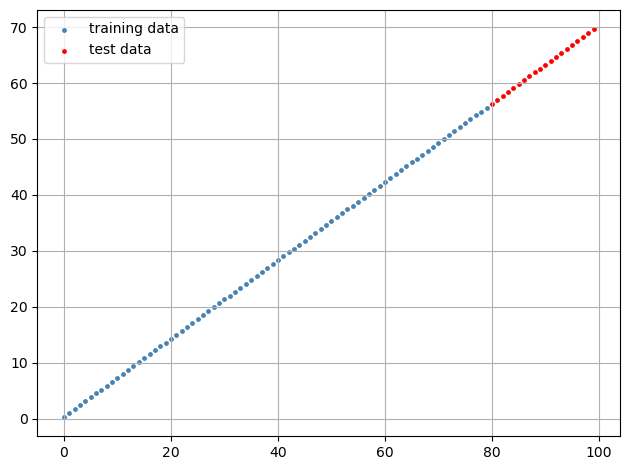

In [27]:
plt.scatter(X_train, y_train, s=6, color="steelblue", label="training data")
plt.scatter(X_test, y_test, s=6, color="red", label="test data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [28]:
# create the class
class LinearRegressionv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [29]:
class LinearRegressionv2(nn.Module):
    def __init__(self):
        super().__init__()
        

3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [30]:
torch.manual_seed(SEED)
model_linear = LinearRegressionv1()
# model_linear = LinearRegressionModel()
print(model_linear.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [31]:
list(model_linear.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
model_linear = model_linear.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [34]:
loss_fun = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_linear.parameters(), lr=0.0001)

4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [35]:
epochs = 150
loss_train_values = []
loss_test_values = []
y_pred_test_values = []

for epoch in range(epochs):
    # train
    model_linear.train()
    y_pred_train = model_linear(X_train)
    loss_train = loss_fun(y_pred_train, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    # test
    model_linear.eval()
    with torch.inference_mode():
        y_pred_test = (model_linear(X_test))
        loss_test = loss_fun(y_pred_test, y_test)
        loss_test_values.append(loss_test.cpu().detach().numpy())
        loss_train_values.append(loss_train.cpu().detach().numpy())
        y_pred_test_values.append(y_pred_test)

        # if epoch % 20 == 0:
        print(f"Epoch {epoch} | MAE Train loss: {loss_train} | MAE Test loss: {loss_test}")

Epoch 0 | MAE Train loss: 14.521921157836914 | MAE Test loss: 32.333778381347656
Epoch 1 | MAE Train loss: 14.365796089172363 | MAE Test loss: 31.980152130126953
Epoch 2 | MAE Train loss: 14.209671020507812 | MAE Test loss: 31.626529693603516
Epoch 3 | MAE Train loss: 14.053545951843262 | MAE Test loss: 31.272903442382812
Epoch 4 | MAE Train loss: 13.897419929504395 | MAE Test loss: 30.919279098510742
Epoch 5 | MAE Train loss: 13.741294860839844 | MAE Test loss: 30.56565284729004
Epoch 6 | MAE Train loss: 13.585169792175293 | MAE Test loss: 30.212026596069336
Epoch 7 | MAE Train loss: 13.429045677185059 | MAE Test loss: 29.8584041595459
Epoch 8 | MAE Train loss: 13.272920608520508 | MAE Test loss: 29.504779815673828
Epoch 9 | MAE Train loss: 13.116795539855957 | MAE Test loss: 29.151153564453125
Epoch 10 | MAE Train loss: 12.960670471191406 | MAE Test loss: 28.797529220581055
Epoch 11 | MAE Train loss: 12.804544448852539 | MAE Test loss: 28.44390296936035
Epoch 12 | MAE Train loss: 12.

In [36]:
with torch.inference_mode():
    y_pred_test_values = model_linear(X_test)

In [37]:
model_linear.state_dict()

OrderedDict([('weights', tensor([0.7022], device='cuda:0')),
             ('bias', tensor([0.1401], device='cuda:0'))])

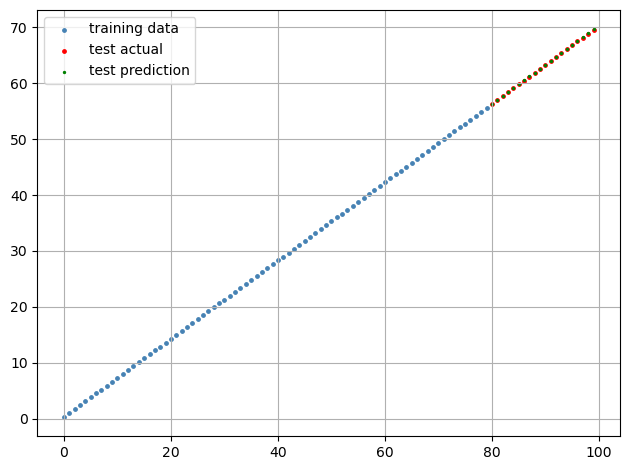

In [38]:
plt.scatter(X_train.cpu(), y_train.cpu(), s=6, color="steelblue", label="training data")
plt.scatter(X_test.cpu(), y_test.cpu(), s=6, color="red", label="test actual")
plt.scatter(X_test.cpu(), y_pred_test_values.cpu().flatten() , s=2, color="green", label="test prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'MAE')

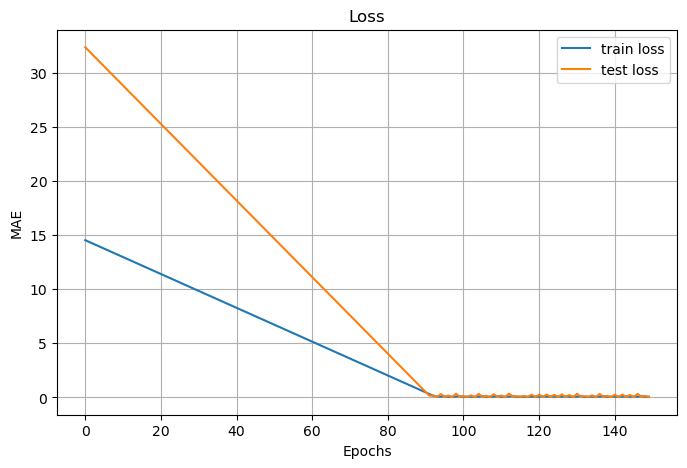

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(loss_train_values, label="train loss")
ax.plot(loss_test_values, label="test loss")
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("{x:,.0F}"))
ax.legend()
ax.grid(True)
ax.set_title("Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")

In [50]:
list(model_linear.parameters())

[Parameter containing:
 tensor([0.7022], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1401], device='cuda:0', requires_grad=True)]

5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [51]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_LinearRegressionV1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_linear.state_dict(), f=MODEL_SAVE_PATH)

In [59]:
model_linear_loaded = LinearRegressionv1()
model_linear_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH)) 
model_linear_loaded.to(device)
model_linear_loaded.state_dict()

OrderedDict([('weights', tensor([0.7022], device='cuda:0')),
             ('bias', tensor([0.1401], device='cuda:0'))])

In [63]:
with torch.inference_mode():
    y_preds_loaded_model = model_linear_loaded(X_test)

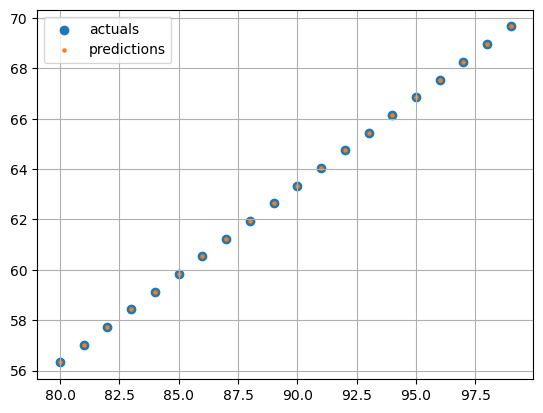

In [71]:
plt.scatter(X_test.cpu(), y_preds_loaded_model.cpu(), label="actuals")
plt.scatter(X_test.cpu(), y_preds_loaded_model.cpu(), label="predictions", s=5)
plt.grid(True)
plt.legend();